1.3.1 Importing Data Libraries 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [3]:
df = pd.read_csv("sonar.all-data.csv")


Data Cleaning

In [6]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

1.3.3 Data Visualization

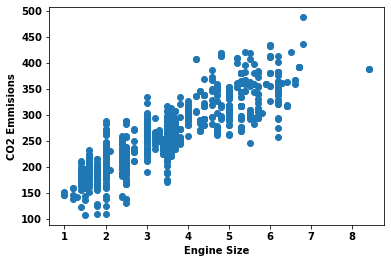

In [22]:
plt.scatter(df.ENGINESIZE ,df.CO2EMISSIONS )

plt.xlabel("Engine Size")
plt.ylabel("CO2 Emmisions")
plt.show()

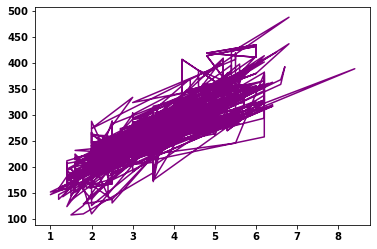

In [5]:
plt.plot(df.ENGINESIZE, df.CO2EMISSIONS, color="purple") 
plt.show()

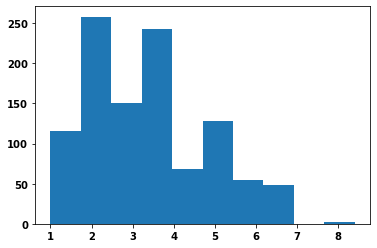

In [18]:
plt.hist(df.ENGINESIZE )
plt.show()

In [7]:
fig = px.pie(df, values='CO2EMISSIONS' , names='ENGINESIZE')
fig.show()

1.3.3 Generating train & test data 

In [4]:
train = df[:(int((len(df)*0.8)))]
test = df[(int((len(df)*0.8))):]

n = int((len(df)*0.8))

print (int((len(df)*0.8)))

165


In [9]:
train_x = np.array(train[["ENGINESIZE"]])
train_y = np.array(train[["CO2EMISSIONS"]])

test_x = np.array(train[["ENGINESIZE"]])
test_y = np.array(train[["CO2EMISSIONS"]])

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

train_x = train_x.reshape((n,1))
lg = LinearRegression()

# finding the best value for which results in a line that best fits the data
lg.fit(train_x,train_y)
y_pred = lg.predict(test_x)

mse = mean_squared_error(train_y,y_pred)
rmse = np.sqrt(mse)
r2_score = lg.score(train_x,train_y)

print(rmse)
print(r2_score)

31.582475112099555
0.7565253709288298


In [11]:
#finding slope
lg.coef_
#finding intercept
lg.intercept_

array([127.16989951])

1.3.4 Plot the regression line 

Text(0, 0.5, 'Emission')

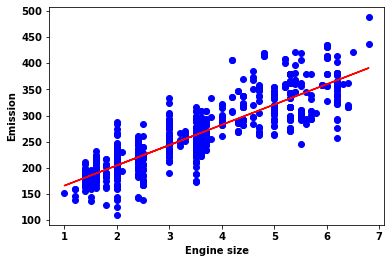

In [12]:
plt.scatter(train["ENGINESIZE"], train["CO2EMISSIONS"], color='blue')
plt.plot(train_x, lg.coef_*train_x + lg.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

Text(0, 0.5, 'Emission')

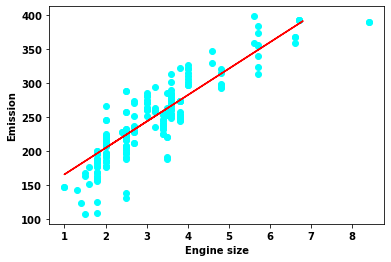

In [13]:
plt.scatter(test["ENGINESIZE"], test["CO2EMISSIONS"], color='cyan')
plt.plot(test_x, lg.coef_*test_x + lg.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

1.3.5 Predict future values

In [14]:
def get_regression_predictions(input_features,intercept,slope):
    predicted_values = input_features*slope + intercept
    return predicted_values

my_engine_size = 2.0
estimated_emission = get_regression_predictions(my_engine_size,lg.intercept_[0],lg.coef_[0][0])

print ("Estimated Emission :", estimated_emission)

Estimated Emission : 204.7601471809324


In [15]:
print(mse)
print(r2_score)

997.4527342063877
0.7565253709288298
